In [2]:
import numpy as np
import gym
import math
import random
from collections import namedtuple
from itertools import count
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.distributions.normal import Normal


%matplotlib inline

In [28]:
env = gym.make('Breakout-ram-v0')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

False


In [4]:
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]
steps_done = 0
episode_rewards= list()

In [5]:
def select_action(state):
    global steps_done
    steps_done += 1
    return torch.tensor([[random.randrange(n_actions)]], dtype=torch.long, device=device)

In [6]:
def optimize_model():
    pass

In [23]:
def plot_durations():
    plt.figure(2)
    plt.clf()
    rewards_t = torch.tensor(episode_rewards, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(rewards_t.numpy())

    if len(rewards_t) >= 10:
        means = rewards_t.unfold(0, 10, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(9), means))
        plt.plot(means.numpy())

    plt.pause(0.001)

In [24]:
def modify_reward(reward, state, next_state, done, t):
    return reward

Complete epoch 0 3.0
Complete epoch 1 0.0


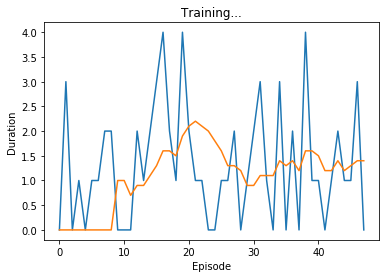

<function matplotlib.pyplot.show(*args, **kw)>

In [25]:
EPOCH = 1

num_episodes = [10] * 1 + [1] * 1
for epoch in range(len(num_episodes)):
    for i_episode in range(num_episodes[epoch]):
        state = torch.tensor([env.reset()], dtype=torch.float, device=device)
        total_reward = 0
        for t in count():
            action = select_action(state)
            if epoch == len(num_episodes) - 1:
                env.render()
            next_state, reward, done, _ = env.step(action.item())
            total_reward += reward      
            if next_state is None:
                next_state = state
            else:
                next_state = torch.tensor([next_state], dtype=torch.float, device=device)
            
            reward = modify_reward(reward, state, next_state, done, t)  
            reward = torch.tensor([reward], dtype=torch.float, device=device)

            state = next_state
            optimize_model()

            if done:
                episode_rewards.append(total_reward)
                break
            
    print('Complete epoch {}'.format(epoch), np.mean(episode_rewards[-EPOCH:]))
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
env.close()
plot_durations()
plt.show